# Case Study - Summer Olympics

![title](img/logo.png)

Does a host country win more medals?

## 1.1  Medals in the Summer Olympics

### 1.1.0 Import Packages and set Data File Objects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path

In [2]:
Data = Path.cwd() / 'Data' 
EDITIONS_file = Data / 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
COUNTRY_CODES_file = Data / 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
ALL_MEDALIST_file = Data / 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'

### 1.1.1  Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv

In [3]:
pd.read_csv(EDITIONS_file, sep='\t').head()

,Edition,Bronze,Gold,Silver,Grand Total,City,Country
0,1896,40,64,47,151,Athens,Greece
1,1900,142,178,192,512,Paris,France
2,1904,123,188,159,470,St. Louis,United States
3,1908,211,311,282,804,London,United Kingdom
4,1912,284,301,300,885,Stockholm,Sweden


### 1.1.2 Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv

In [4]:
pd.read_csv(COUNTRY_CODES_file).head()

,Country,NOC,ISO code
0,Afghanistan,AFG,AF
1,Albania,ALB,AL
2,Algeria,ALG,DZ
3,American Samoa*,ASA,AS
4,Andorra,AND,AD


### 1.1.3 summer_1896.csv, summer_1900.csv, …, summer_2008.csv ....

In [5]:
pd.read_csv(ALL_MEDALIST_file, sep='\t', header=4).head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## 1.2 Case Study Explorations

### 1.2.1 Loading Olympic edition DataFrame

In this chapter, you'll be using The Guardian's Olympic medal dataset.

Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

In [6]:
# Prepare a DataFrame editions from a tab-separated values (TSV) file.
# You'll have to use the option sep='\t' because the file uses tabs to delimit fields (pd.read_csv() expects commas by default)

editions = pd.read_csv(EDITIONS_file, sep='\t')

# Select only the columns 'Edition', 'Grand Total', 'City', and 'Country' from editions

editions = editions[['Edition', 'Grand Total', 'City', 'Country'] ]

# Print the final DataFrame editions in entirety (there are only 26 rows). 

editions


,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


### 1.2.2 Loading IOC codes DataFrames

Your task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

In [7]:
# Load DataFrame from file_path: ioc_codes

ioc_codes = pd.read_csv(COUNTRY_CODES_file)

# Select only the columns 'Country' and 'NOC' from ioc_codes.

ioc_codes = ioc_codes[['Country','NOC']]

# Print the leading 5 and trailing 5 rows of the DataFrame ioc_codes (there are 200 rows in total).

ioc_codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [8]:
ioc_codes.tail()

,Country,NOC
196,Vietnam,VIE
197,Virgin Islands*,ISV
198,Yemen,YEM
199,Zambia,ZAM
200,Zimbabwe,ZIM


### 1.2.3 Building medals DataFrame

In [9]:
# medal DataFrame setup

medals = pd.read_csv(ALL_MEDALIST_file, sep='\t', header=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]
medals.head()

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896


### 1.2.4 DataFrame Summary

Summary -> so far we have:

1. editions      # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes     # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals        # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'

In [10]:
editions.head(2)

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France


In [11]:
ioc_codes.head(2)

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB


In [12]:
medals.head(2)

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896


In [13]:
# read all 'medals' file
pd.read_csv(ALL_MEDALIST_file, sep='\t', header=4).head(8)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver


## 1.3 Quantifying performance

### 1.3.1 Counting medals by country/edition in a pivot table

df.pivot_table(values, index, columns, aggfunc, Fill_value


Constructing a pivot table:

index: column to use as index of pivot table

values: column(s) to aggregate

aggfunc: function to apply for aggregation

columns: categories as columns of pivot table

In [14]:
# Construct the pivot_table: medal_counts

medal_counts = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')

# Print the first & last 5 rows of medal_counts

medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
medal_counts.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,2.0,NaN,2.0,NaN,57.0,6.0,NaN,1.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,3.0,NaN,20.0,2.0,132.0,3.0,1.0,5.0,...,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN,NaN
2000,NaN,NaN,5.0,NaN,20.0,1.0,183.0,4.0,3.0,6.0,...,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,...,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0,NaN
2008,1.0,NaN,2.0,NaN,51.0,6.0,149.0,3.0,7.0,5.0,...,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0,NaN


As you can see, the pivot table DataFrame has mostly NaN entries (because most countries do not win any medals in a given Olympic edition).

Summary -> so far we have:

1. editions      # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes     # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals        # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
4. medal_counts  # count of medals by country

### 1.3.2 Computing fraction of medals per Olympic edition

Extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; the method .divide() performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.


In [16]:
# Set Index of editions: totals

totals = editions.set_index('Edition')

totals.head()

,Grand Total,City,Country
Edition,,,
1896,151,Athens,Greece
1900,512,Paris,France
1904,470,St. Louis,United States
1908,804,London,United Kingdom
1912,885,Stockholm,Sweden


In [17]:
# Reassign totals['Grand Total']: totals
# Extract the 'Grand Total' column from totals and assign the result back to totals.

totals = totals['Grand Total']

In [18]:
totals.head()

Edition
1896    151
1900    512
1904    470
1908    804
1912    885
Name: Grand Total, dtype: int64

In [19]:
# Divide medal_counts by totals: fractions
# Divide the DataFrame medal_counts by totals along each row. You will have to use the .divide() method with the option axis='rows'. Assign the result to fractions.

fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
fractions.head()


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
fractions.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,0.001173,NaN,0.001173,NaN,0.033431,0.003519,NaN,0.000587,...,NaN,NaN,0.131378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,0.001614,NaN,0.010758,0.001076,0.071006,0.001614,0.000538,0.002690,...,NaN,NaN,0.139860,0.001076,NaN,NaN,0.013986,0.000538,NaN,NaN
2000,NaN,NaN,0.002481,NaN,0.009926,0.000496,0.090819,0.001985,0.001489,0.002978,...,NaN,0.000496,0.123077,0.001985,NaN,0.000496,0.012903,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,0.023524,NaN,0.078579,0.004004,0.002503,0.001001,...,NaN,NaN,0.132132,0.002503,0.001001,NaN,NaN,NaN,0.001502,NaN
2008,0.00049,NaN,0.000979,NaN,0.024976,0.002938,0.072968,0.001469,0.003428,0.002449,...,NaN,NaN,0.154261,0.002938,0.000490,0.000490,NaN,NaN,0.001959,NaN


### 1.3.3 Computing percentage change in fraction of medals won

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the pandas documentation has additional information.

Summary -> so far we have:

1. editions      # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes     # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals        # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
4. medal_counts  # count of medals by country
5. fractions     # computing fraction of medals per Olympic edition

Note: A common alternative to rolling statistics is to use an expanding window, which yields the value of the statistic with all the data available up to that point in time, https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html

In [21]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()
mean_fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416,NaN,NaN,...,NaN,NaN,0.119936,NaN,NaN,NaN,NaN,NaN,NaN,0.053071
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.015653,NaN,NaN,...,NaN,NaN,0.359390,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1908,NaN,NaN,NaN,0.023632,NaN,NaN,0.011505,0.012051,NaN,NaN,...,NaN,NaN,0.289132,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1912,NaN,NaN,NaN,0.017466,NaN,NaN,0.011505,0.012804,NaN,NaN,...,NaN,NaN,0.254131,NaN,NaN,NaN,NaN,NaN,NaN,0.041054


In [22]:
# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100
fractions_change.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [23]:
# Reset the index of fractions_change: fractions_change
# This will make 'Edition' an ordinary column.
fractions_change = fractions_change.reset_index()
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [24]:
fractions_change.tail()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
21,1992,NaN,0.0,-7.214076,0.0,-6.767308,NaN,2.754114,-3.034840,NaN,...,0.0,0.000000,-1.329330,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0
22,1996,NaN,0.0,8.959211,0.0,1.306696,NaN,10.743275,-3.876773,NaN,...,0.0,0.000000,-1.010378,NaN,0.000000,NaN,-2.667732,-10.758472,0.000000,0.0
23,2000,NaN,0.0,19.762488,0.0,0.515190,-26.935484,12.554986,-3.464221,88.387097,...,0.0,-12.025323,-1.341842,42.258065,0.000000,NaN,-2.696445,0.000000,0.000000,0.0
24,2004,NaN,0.0,0.000000,0.0,9.625365,0.000000,8.161162,-2.186922,48.982144,...,0.0,0.000000,-1.031922,21.170339,-1.615969,0.000000,0.000000,0.000000,-43.491929,0.0
25,2008,NaN,0.0,-8.197807,0.0,8.588555,91.266408,6.086870,-3.389836,31.764436,...,0.0,0.000000,-0.450031,14.610625,-6.987342,-0.661117,0.000000,0.000000,-23.316533,0.0


Summary -> so far we have:

1. editions          # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes         # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals            # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
4. medal_counts      # count of medals by country
5. fractions         # computing fraction of medals per Olympic edition
6. mean_fractions    # mean of 'fractions' to see there is a host country advantage; you first want to see how the fraction of medals won changes from edition to edition.
7. fractions_change  # % change of each country fraction of olympic medals won

## 1.4 Reshaping and plotting


### 1.4.1 Building hosts DataFrame

Your task here is to prepare a DataFrame hosts by left joining editions and ioc_codes.

Once created, you will subset the Edition and NOC columns and set Edition as the Index.

There are some missing NOC values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.


In [25]:
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [26]:
ioc_codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [27]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')
hosts.head()

,Edition,Grand Total,City,Country,NOC
0,1896,151,Athens,Greece,GRE
1,1900,512,Paris,France,FRA
2,1904,470,St. Louis,United States,USA
3,1908,804,London,United Kingdom,GBR
4,1912,885,Stockholm,Sweden,SWE


In [28]:
# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index("Edition")
hosts.head()

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA
1908,GBR
1912,SWE


In [29]:
# Fix missing 'NOC' values of hosts

print(hosts.loc[hosts.NOC.isnull()])

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


In [30]:
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

In [31]:
# Reset Index of hosts: hosts
hosts = hosts.reset_index()

In [32]:
hosts.head()

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


You now have a DataFrame consisting of all the host

### 1.4.2 Reshaping for analysis

Summary -> so far we have:

1. editions          # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes         # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals            # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
4. medal_counts      # count of medals by country
5. fractions         # computing fraction of medals per Olympic edition
6. mean_fractions    # mean of 'fractions' to see there is a host country advantage; you first want to see how the fraction of medals won changes from edition to edition.
7. fractions_change  # % change of each country fraction of olympic medals won per each Olympics (edition)
8. hosts             # DataFrame consisting of all the host

This exercise starts off with fractions_change and hosts already loaded.

Your task here is to reshape the fractions_change DataFrame for later analysis.

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.


In [33]:
# lets see fraction_change first
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [34]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [35]:
reshaped.tail()

,Edition,NOC,Change
3583,1992,ZZX,0.0
3584,1996,ZZX,0.0
3585,2000,ZZX,0.0
3586,2004,ZZX,0.0
3587,2008,ZZX,0.0


In [36]:
# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

(3588, 3) (26, 139)


In [37]:
# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[(reshaped['NOC'])=='CHN']

chn.tail()

,Edition,NOC,Change
567,1992,CHN,4.240630
568,1996,CHN,7.860247
569,2000,CHN,-3.851278
570,2004,CHN,0.128863
571,2008,CHN,13.251332


On looking at the hosting countries from the last 5 Olympic editions and the fractional change of medals won by China the last 5 editions, you can see that China fared significantly better in 2008 (i.e., when China was the host country).

Summary -> so far we have:

1. editions          # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes         # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals            # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
4. medal_counts      # count of medals by country
5. fractions         # computing fraction of medals per Olympic edition
6. mean_fractions    # mean of 'fractions' to see there is a host country advantage; you first want to see how the fraction of medals won changes from edition to edition.
7. fractions_change  # % change of each country fraction of olympic medals won per each Olympics (edition)
8. hosts             # DataFrame consisting of all the host
9. reshaped          # reshape the fractions_change DataFrame (#7) for later analysis

### 1.4.3 Merging to compute influence

This exercise starts off with the DataFrames reshaped and hosts in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.


In [38]:
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [39]:
hosts.head()

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [40]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped,hosts,how='inner')
merged.head()

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332


In [41]:
# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


Summary -> so far we have:

1. editions          # 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
2. ioc_codes         # 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
3. medals            # 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
4. medal_counts      # count of medals by country
5. fractions         # computing fraction of medals per Olympic edition
6. mean_fractions    # mean of 'fractions' to see there is a host country advantage; you first want to see how the fraction of medals won changes from edition to edition.
7. fractions_change  # % change of each country fraction of olympic medals won per each Olympics (edition)
8. hosts             # DataFrame consisting of all the host
9. reshaped          # reshape the fractions_change DataFrame (#7) for later analysis
10. merged           # merged DataFrame between reshaped and hosts on inner join
11. influence        # indexed 'merged' on 'Edition' column and sorted

 It would be far more informative to visualize these results. This is exactly what you'll do in the next exercise!

### 1.4.4 Plotting influence of host country

This final exercise starts off with the DataFrames influence and editions in the namespace. Your job is to plot the influence of being a host country.


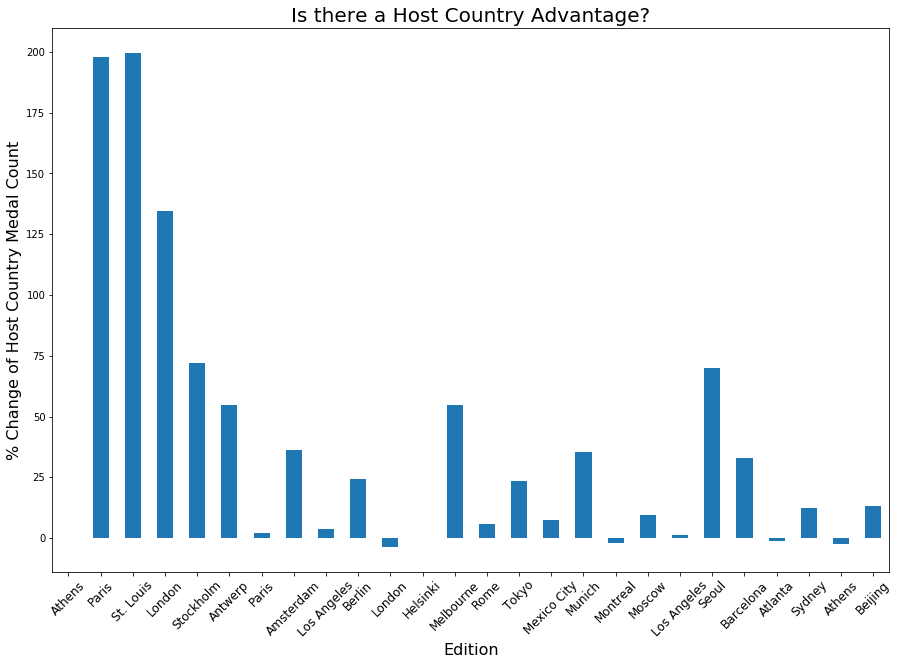

In [42]:
# Extract influence['Change']: change
change = influence['Change']

# Increase plot size
fig, ax = plt.subplots(figsize=(15, 10))

# Make bar plot of change: ax
ax = change.plot(kind='bar', rot=45 )

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count", fontsize=16)
ax.set_xlabel("Edition",fontsize=16)
ax.set_title("Is there a Host Country Advantage?", fontsize=20)
ax.set_xticklabels(editions['City'], fontsize=12)

# Display the plot
plt.show()